In [1]:
%matplotlib inline

# Matplotlib tutorial

Before going through this tutorial, read this [short description](http://matplotlib.org/faq/usage_faq.html#general-concepts) of Matplotlib.

There are two different interfaces: a matlab-like interface and an object-oriented interface. I prefer the object-oriented and will use it here, although it will be easy to switch to the other interface if you choose. In general, a reasonable approch is to use the matlab-like interface for interactive plotting from ipython and use the object-oriented interface for scripting (but again, I typically just use the object-oriented interface).

When you are trying to find your way around Matplotlib, a good place to start is the [gallery](http://matplotlib.org/gallery.html), where you can scan through images to find something similar to what you are trying to produce. To explore the difference between the object-oriented interface and the matlab-like interface, you can compare code from the [api](http://matplotlib.org/gallery.html#api) and [pylab](http://matplotlib.org/gallery.html#pylab_examples) examples.

To get started, we'll need to import `matplotlib.pyplot` as well as `numpy` and `pandas`, which we'll use to work with the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

For many of the plots below, we'll work with the data set from the last Pandas tutorial.

In [3]:
dat = pd.read_csv('../data/array.csv')

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 5 columns):
gene      1100 non-null int64
brain     1100 non-null int64
region    1100 non-null object
side      1100 non-null object
value     1100 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 51.6+ KB


In [5]:
dat.head()

,gene,brain,region,side,value
0,2318338,135,CBC,L,5.10082
1,2318338,144,CBC,L,5.52023
2,2318338,144,CBC,R,5.22970
3,2318338,182,CBC,L,4.54668
4,2318338,183,CBC,L,5.74049


In [6]:
print('The data set contains {} genes, {} brains, and {} regions'.format(dat.gene.nunique(),
                                                                         dat.brain.nunique(),
                                                                         dat.region.nunique()))

The data set contains 100 genes, 4 brains, and 2 regions


## Creating figures and axes

The easiest way to create a figure is `plt.subplots`. A figure can consists of several different subplots, which each have their own axes. At first, we'll just focus on the single axes case. If no arguments are passed, it returns a figure object and a single axes object.

    fig, ax = plt.subplots()
Both the figure and axes objects have a lot of methods, so just pressing `fig.<TAB>` or `ax.<TAB>` can be pretty overwhelming. The main plotting commands can be accessed under `ax`. Some popular ones include `scatter`, `plot`, `bar`, `boxplot`, and `hist`.

## Histograms

First, we'll create a histogram using the "value" column from `dat`. Each plot method returns objects that you may want to customize further or use for something else. In the case of a histogram, it is the height of the bars, the bin locations, and the bar objects themselves. If you don't need them for anything, you don't have to assign them a name (and, because they're not assigned, they'll show up in the output of ipython).

(array([  78.,  186.,  246.,  141.,  142.,  126.,   97.,   55.,   18.,   11.]),
 array([  3.2936 ,   4.16059,   5.02758,   5.89457,   6.76156,   7.62855,
          8.49554,   9.36253,  10.22952,  11.09651,  11.9635 ]),
 <a list of 10 Patch objects>)

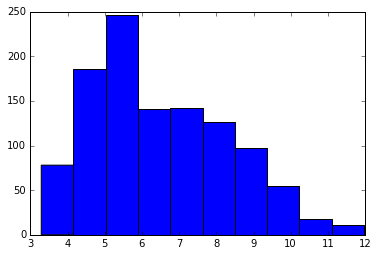

In [7]:
fig, ax = plt.subplots()
ax.hist(dat.value)

Change the bin size.

(array([  18.,   33.,   62.,   79.,   72.,  110.,   95.,   86.,   50.,
          46.,   59.,   58.,   50.,   60.,   41.,   33.,   48.,   23.,
          24.,   24.,   10.,    7.,    1.,    4.,    7.]),
 array([  3.2936  ,   3.640396,   3.987192,   4.333988,   4.680784,
          5.02758 ,   5.374376,   5.721172,   6.067968,   6.414764,
          6.76156 ,   7.108356,   7.455152,   7.801948,   8.148744,
          8.49554 ,   8.842336,   9.189132,   9.535928,   9.882724,
         10.22952 ,  10.576316,  10.923112,  11.269908,  11.616704,  11.9635  ]),
 <a list of 25 Patch objects>)

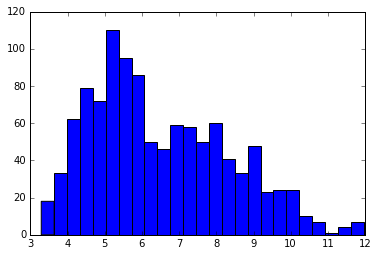

In [8]:
fig, ax = plt.subplots()
ax.hist(dat.value, bins=25)

Adjust colors.

(array([  18.,   33.,   62.,   79.,   72.,  110.,   95.,   86.,   50.,
          46.,   59.,   58.,   50.,   60.,   41.,   33.,   48.,   23.,
          24.,   24.,   10.,    7.,    1.,    4.,    7.]),
 array([  3.2936  ,   3.640396,   3.987192,   4.333988,   4.680784,
          5.02758 ,   5.374376,   5.721172,   6.067968,   6.414764,
          6.76156 ,   7.108356,   7.455152,   7.801948,   8.148744,
          8.49554 ,   8.842336,   9.189132,   9.535928,   9.882724,
         10.22952 ,  10.576316,  10.923112,  11.269908,  11.616704,  11.9635  ]),
 <a list of 25 Patch objects>)

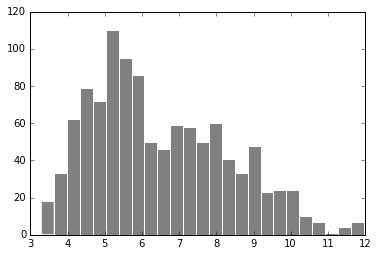

In [9]:
fig, ax = plt.subplots()
ax.hist(dat.value, bins=25,
        edgecolor='w', facecolor='0.5')

Set axis labels.

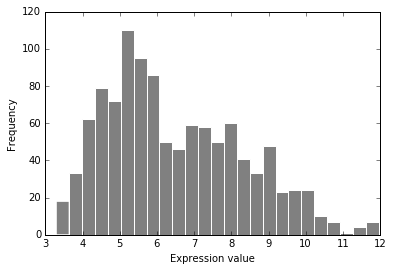

In [10]:
fig, ax = plt.subplots()
ax.hist(dat.value, bins=25,
        edgecolor='w', facecolor='0.5')
ax.set_xlabel('Expression value')
ax.set_ylabel('Frequency')

Normalize the histogram.

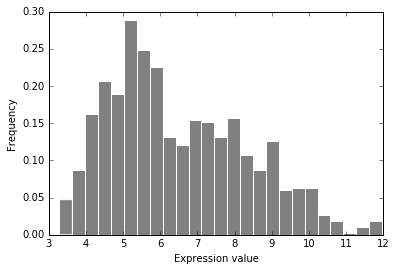

In [11]:
fig, ax = plt.subplots()
ax.hist(dat.value, bins=25,
        edgecolor='w', facecolor='0.5',
        normed=True)
ax.set_xlabel('Expression value')
ax.set_ylabel('Frequency')

Create a cumulative histogram.

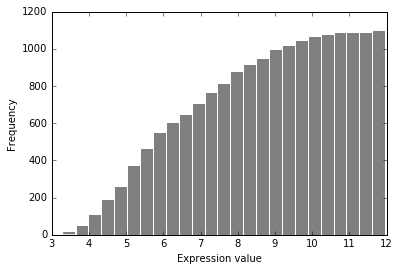

In [12]:
fig, ax = plt.subplots()
ax.hist(dat.value, bins=25,
        edgecolor='w', facecolor='0.5',
        cumulative=True)
ax.set_xlabel('Expression value')
ax.set_ylabel('Frequency')

## Scatter plots

For the scatter plots, we'll use mean expression of each game for the two regions present.

In [13]:
mean_exp = dat.groupby(['gene', 'region'])['value'].mean().unstack()

In [14]:
mean_exp.head()

region,CBC,DFC
gene,,
2318338,5.227584,5.127598
2340186,8.559380,7.600918
2356721,7.014396,5.886197
2367154,10.261352,9.961687
2369484,5.599340,5.921677


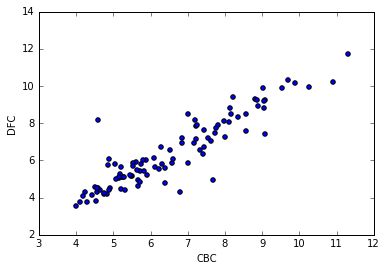

In [15]:
fig, ax = plt.subplots()

ax.scatter(mean_exp.CBC, mean_exp.DFC)
ax.set_xlabel('CBC')
ax.set_ylabel('DFC')

Make dots semi-transparent and remove edgecolor.

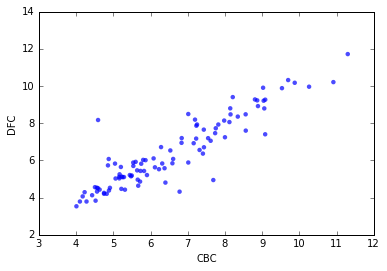

In [16]:
fig, ax = plt.subplots()
ax.scatter(mean_exp.CBC, mean_exp.DFC, alpha=0.7, edgecolor='none')
ax.set_xlabel('CBC')
ax.set_ylabel('DFC')

Change color by the difference between CBC and DFC (which is a bit silly, considering that is already reflected in the position).

In [17]:
mean_by_reg = dat.groupby(['gene', 'region'])['value'].mean().unstack()
mean_by_reg['abs_diff'] = np.abs(mean_by_reg.CBC - mean_by_reg.DFC)

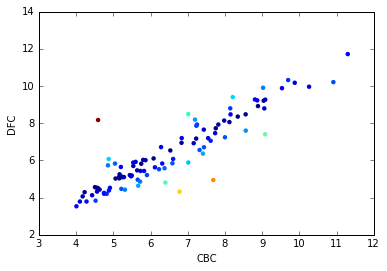

In [18]:
fig, ax = plt.subplots()
ax.scatter(mean_exp.CBC, mean_exp.DFC, edgecolor='none', c=mean_by_reg.abs_diff)
ax.set_xlabel('CBC')
ax.set_ylabel('DFC')

Change the tick locations.

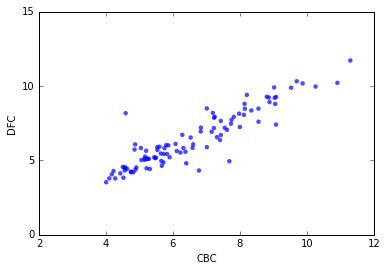

In [19]:
fig, ax = plt.subplots()
ax.scatter(mean_exp.CBC, mean_exp.DFC, alpha=0.7, edgecolor='none')

ax.locator_params(nbins=5)  ## reduce the number of ticks

ax.set_xlabel('CBC')
ax.set_ylabel('DFC')

Remove the ticks completely.

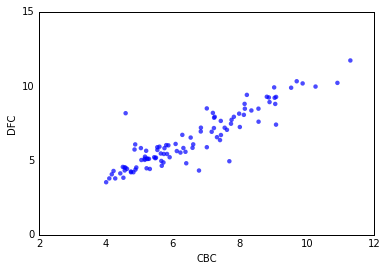

In [20]:
fig, ax = plt.subplots()
ax.scatter(mean_exp.CBC, mean_exp.DFC, alpha=0.7, edgecolor='none')

ax.tick_params(length=0)
ax.locator_params(nbins=5)

ax.set_xlabel('CBC')
ax.set_ylabel('DFC')

Add grid lines.

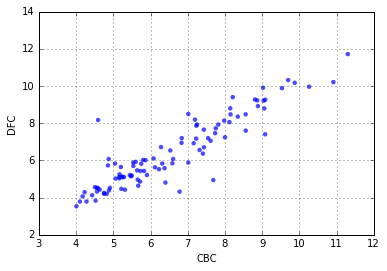

In [21]:
fig, ax = plt.subplots()
ax.scatter(mean_exp.CBC, mean_exp.DFC, alpha=0.7, edgecolor='none')

ax.grid(True)

ax.set_xlabel('CBC')
ax.set_ylabel('DFC')

Keep grid but reduce number of ticks.

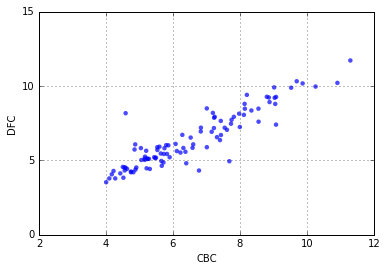

In [22]:
fig, ax = plt.subplots()
ax.scatter(mean_exp.CBC, mean_exp.DFC, alpha=0.7, edgecolor='none')

ax.grid(True)
ax.locator_params(nbins=5)

ax.set_xlabel('CBC')
ax.set_ylabel('DFC')

## Bar plots

For the bar plots, we'll use the gene that has the maximum expression difference between the two regions.

In [23]:
max_diff_gene = mean_by_reg.abs_diff.idxmax()
max_diff = mean_by_reg.loc[max_diff_gene, ['CBC', 'DFC']]

In [24]:
max_diff

region
CBC    4.589266
DFC    8.171688
Name: 2959039, dtype: float64

<Container object of 2 artists>

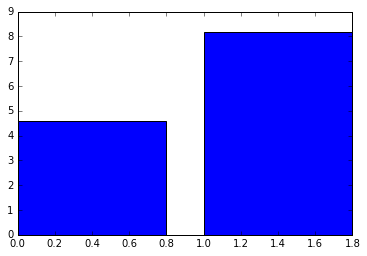

In [25]:
fig, ax = plt.subplots()
xlocs = np.arange(max_diff.size)
ax.bar(xlocs, max_diff)

Change width of bar and move to center.

<Container object of 2 artists>

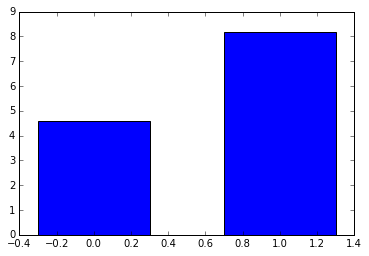

In [26]:
fig, ax = plt.subplots()
xlocs = np.arange(max_diff.size)
ax.bar(xlocs, max_diff, width=0.6, align='center')

Relabel x axis and only keep two x-tick locations.

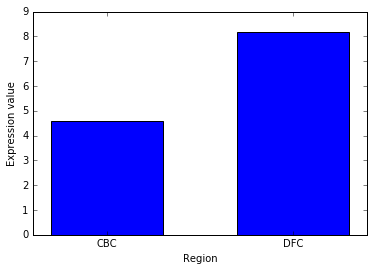

In [27]:
fig, ax = plt.subplots()
xlocs = np.arange(max_diff.size)

ax.bar(xlocs, max_diff, width=0.6, align='center')

ax.set_xticks(xlocs)  # only label where bar is placed
ax.set_xticklabels(max_diff.index)  # use region names instead of numbers

ax.set_xlabel('Region')
ax.set_ylabel('Expression value')

Change figure size, remove x ticks, and reduce number of y ticks.

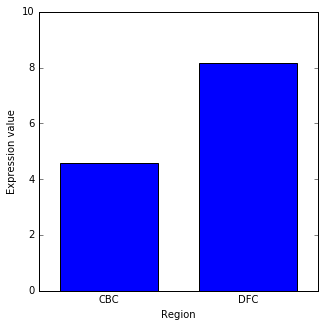

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))
xlocs = np.arange(max_diff.size)

ax.bar(xlocs, max_diff, width=0.7, align='center')

ax.locator_params(axis='y', nbins=5)
ax.tick_params(axis='x', length=0)

ax.set_xticks(xlocs)  # only label where bar is placed
ax.set_xticklabels(max_diff.index)  # use region names instead of numbers

ax.set_xlim(-0.5, 1.5)

ax.set_xlabel('Region')
ax.set_ylabel('Expression value')

Tweak colors and line width.

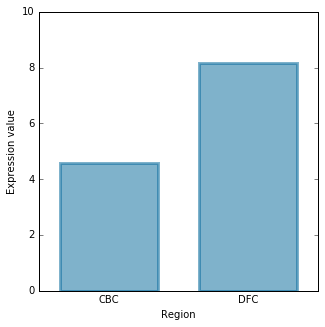

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))
xlocs = np.arange(max_diff.size)

ax.bar(xlocs, max_diff, width=0.7, align='center',
       edgecolor='#006699', facecolor='#006699',
       alpha=0.5,
       linewidth=3)

ax.locator_params(axis='y', nbins=5)
ax.tick_params(axis='x', length=0)

ax.set_xticks(xlocs)  # only label where bar is placed
ax.set_xticklabels(max_diff.index)  # use region names instead of numbers

ax.set_xlim(-0.5, 1.5)

ax.set_xlabel('Region')
ax.set_ylabel('Expression value')

## Line plots

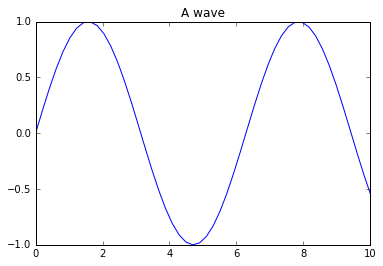

In [30]:
x = np.linspace(0, 10)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.set_title('A wave')

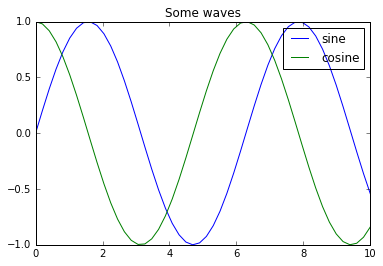

In [31]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label='sine')
ax.plot(x, np.cos(x), label='cosine')
ax.set_title('Some waves')
ax.legend()

Move legend to the top.

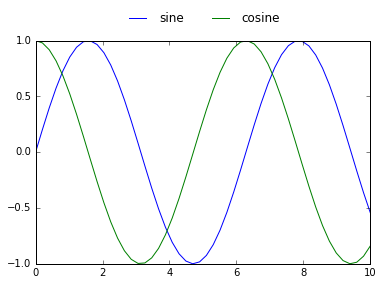

In [32]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label='sine')
ax.plot(x, np.cos(x), label='cosine')
ax.legend(bbox_to_anchor=(0.5, 1.1), ncol=2,
          loc='center', frameon=False)

Fill area between curves.

(0, 6)

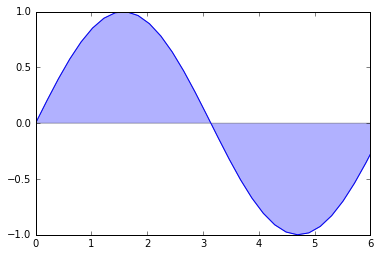

In [33]:
fig, ax = plt.subplots()
xsin = np.sin(x)

ax.plot(x, xsin)

ax.fill_between(x, 0, xsin, alpha=0.3)
ax.set_xlim(0, 6)

## Box plots

For the box plots, we'll use the expression values for the gene that has the maximum difference between the two regions.

In [34]:
max_dat = dat[dat.gene == max_diff_gene]

In [35]:
max_dat

,gene,brain,region,side,value
396,2959039,135,CBC,L,6.14659
397,2959039,144,CBC,L,4.22207
398,2959039,144,CBC,R,4.37319
399,2959039,182,CBC,L,4.05348
400,2959039,183,CBC,L,4.15100
401,2959039,135,DFC,L,8.79102
402,2959039,135,DFC,R,8.44594
403,2959039,144,DFC,R,8.04885
404,2959039,144,DFC,L,8.59903
405,2959039,182,DFC,L,7.50412


The `boxplot` method accepts a sequence of vectors, so below we make a list of containing the expression values for each region.

In [36]:
regions = max_dat.region.unique()

## make a list that contains value column for each region
## [ [CBC values], [DFC values] ]
region_vals = [max_dat[max_dat.region == reg].value for reg in regions]

{'boxes': [<matplotlib.lines.Line2D at 0x7fbd259e9cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbd259f50b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbd259fb940>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbd259fb128>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbd259e9f28>,
  <matplotlib.lines.Line2D at 0x7fbd259861d0>]}

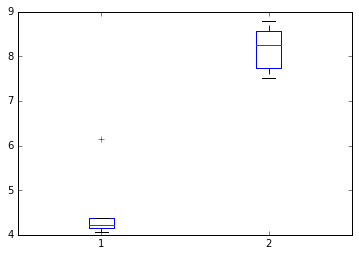

In [37]:
fig, ax = plt.subplots()
ax.boxplot(region_vals)

Set the x label names.

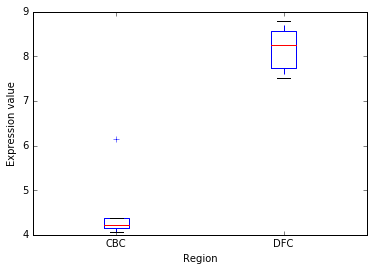

In [38]:
fig, ax = plt.subplots()
ax.boxplot(region_vals)
ax.set_xticklabels(regions)

ax.set_ylabel('Expression value')
ax.set_xlabel('Region')

Change box colors and increase width.

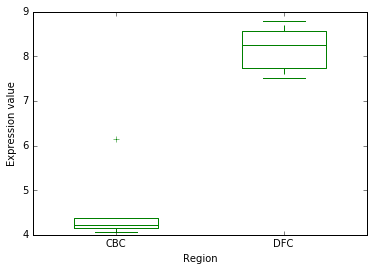

In [39]:
fig, ax = plt.subplots()
bp = ax.boxplot(region_vals, widths=0.5)

## bp is just a dictionary of elements
## that make up the box.
## Iterate through the values and set the color.
## plt.setp is often used instead of a for loop
for elems in bp.values():
    for elem in elems:
        elem.set_color('g')
    
ax.set_xticklabels(regions)

ax.set_ylabel('Expression value')
ax.set_xlabel('Region')

Fill the box instead and only change the box color.

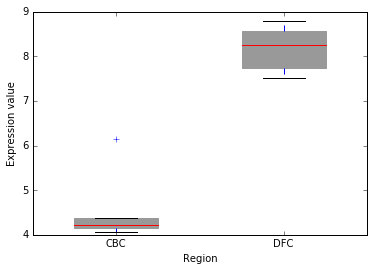

In [40]:
fig, ax = plt.subplots()
bp = ax.boxplot(region_vals, widths=0.5,
                patch_artist=True)

for box in bp['boxes']:
    box.set_color('0.6')
    
ax.set_xticklabels(regions)

ax.set_ylabel('Expression value')
ax.set_xlabel('Region')

Same as above, but make outliers red dots.

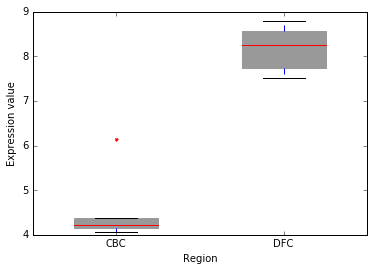

In [41]:
fig, ax = plt.subplots()
bp = ax.boxplot(region_vals, widths=0.5,
                patch_artist=True,
                sym='.')

for box in bp['boxes']:
    box.set_color('0.6')
    
for flier in bp['fliers']:
    flier.set_color('r')
    
ax.set_xticklabels(regions)

ax.set_ylabel('Expression value')
ax.set_xlabel('Region')

## Multiple subplots

Above we have been calling `plt.subplots` without arguments. If we pass `ncols` or `nrows` to this method, it will create several axes objects for us.

(array([  2.,   9.,  19.,  23.,  18.,  12.,  11.,   3.,   2.,   1.]),
 array([-2.37498239, -1.78814814, -1.2013139 , -0.61447966, -0.02764541,
         0.55918883,  1.14602307,  1.73285732,  2.31969156,  2.9065258 ,
         3.49336005]),
 <a list of 10 Patch objects>)

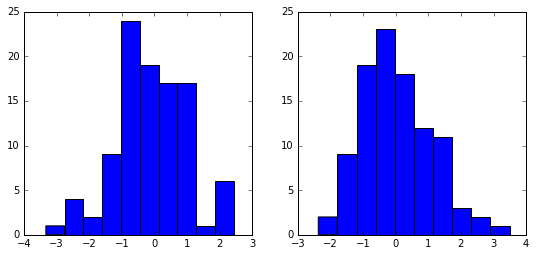

In [42]:
vals1, vals2 = np.random.randn(2, 100)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4))
axes[0].hist(vals1)
axes[1].hist(vals2)

Share the y axis.

(array([  2.,   9.,  19.,  23.,  18.,  12.,  11.,   3.,   2.,   1.]),
 array([-2.37498239, -1.78814814, -1.2013139 , -0.61447966, -0.02764541,
         0.55918883,  1.14602307,  1.73285732,  2.31969156,  2.9065258 ,
         3.49336005]),
 <a list of 10 Patch objects>)

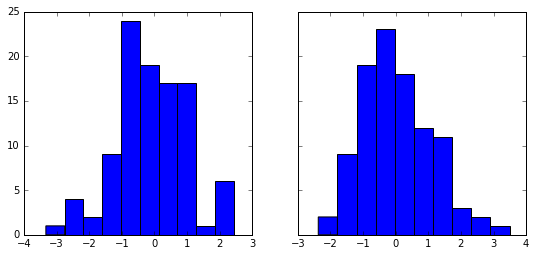

In [43]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4),
                         sharey=True)
axes[0].hist(vals1)
axes[1].hist(vals2)

Add plot titles and legends as usual.

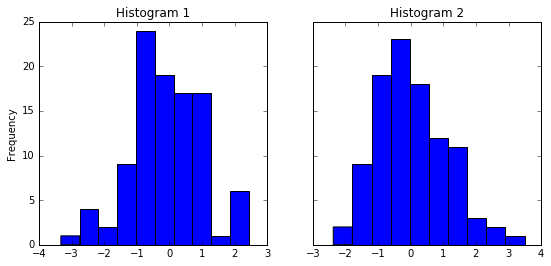

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4),
                               sharey=True)
ax1.hist(vals1)
ax2.hist(vals2)

ax1.set_title('Histogram 1')
ax2.set_title('Histogram 2')

ax1.set_ylabel('Frequency')

If the two x axes would have the same title, we might not want to add an x label to each. We can instead add text to the add just one label.

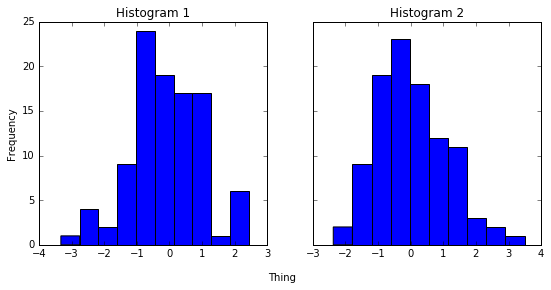

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4),
                         sharey=True)
ax1.hist(vals1)
ax2.hist(vals2)

ax1.set_title('Histogram 1')
ax2.set_title('Histogram 2')

ax1.set_ylabel('Frequency')

fig.text(0.5, 0, 'Thing',
         ha='center')

Add a title for the figure.

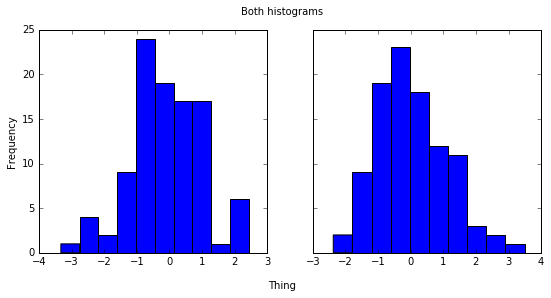

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4),
                         sharey=True)
ax1.hist(vals1)
ax2.hist(vals2)

ax1.set_ylabel('Frequency')

fig.text(0.5, 0, 'Thing',
         ha='center')
fig.suptitle('Both histograms',
             size='large')

Add more rows.

In [47]:
vals = np.random.randn(4, 100)

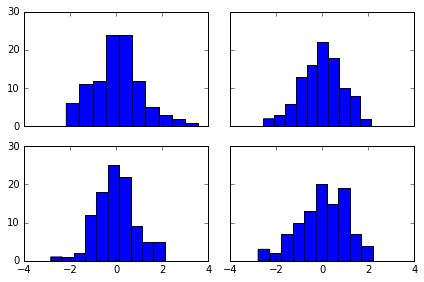

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True)

for val, ax in zip(vals, axes.ravel()):
    ax.hist(val)
    ax.locator_params(nbins=4)
    
fig.tight_layout()

## Heat map

In [49]:
cbc_sorted = mean_exp.sort('CBC', ascending=False)

In [50]:
cbc_sorted.head()

region,CBC,DFC
gene,,
2888243,11.301320,11.715983
2876897,10.914756,10.209187
2367154,10.261352,9.961687
3015216,9.875708,10.173180
3099750,9.699034,10.319400


Predefined [color maps](http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps)

In [51]:
import matplotlib.cm as cm

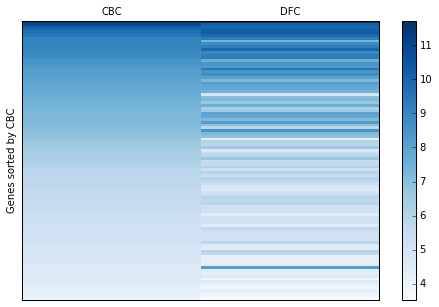

In [52]:
fig, ax = plt.subplots(figsize=(8, 5))

mat = ax.matshow(cbc_sorted, aspect='auto',
                 cmap="Blues")

ax.set_xticks([0, 1])
ax.set_xticklabels(['CBC', 'DFC'])
ax.tick_params(axis='x', length=0)

ax.set_yticks([])
ax.set_ylabel('Genes sorted by CBC')

fig.colorbar(mat)

## Saving figures

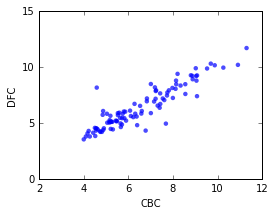

In [53]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(mean_exp.CBC, mean_exp.DFC,
           alpha=0.7, edgecolor='none')

ax.locator_params(nbins=5)

ax.set_xlabel('CBC')
ax.set_ylabel('DFC')

fig.savefig('cbc-dfc-scatter.pdf')